<a href="https://colab.research.google.com/github/Cheruugit/ML_Playground/blob/main/LinearRegression_on_medical_insurance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unveiling the Dynamics of Medical Insurance Costs: A Linear Regression Approach

Let's embark on constructing a linear regression model tailored for predicting medical insurance costs. Within our dataset, we're furnished with a plethora of pertinent features: age, sex, BMI, number of children, smoking status, and region. Our primary objective? To forecast insurance charges based on this array of attributes. We'll delve into the intricate relationships between the variables and the resulting medical expenses. We aim to understand how each factor influences the ultimate cost, thereby shedding light on key determinants within the realm of medical insurance pricing.

About Dataset

age: age of primary beneficiary sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/insurance 1.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
missing= df.isnull().sum()
missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(1337, 7)

#EDA

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'BMI vs Charges')

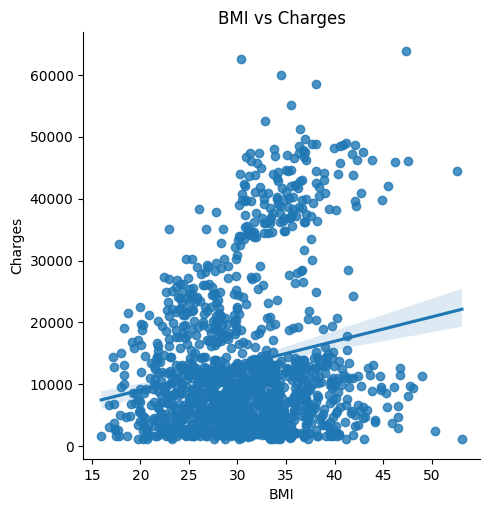

In [ ]:
# bmi and charges
#lmplot  creates a scatter plot with a linear regression line fitted to the data.
sns.lmplot(x= 'bmi', y='charges', data=df)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')

In [ ]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

<Axes: xlabel='children', ylabel='charges'>

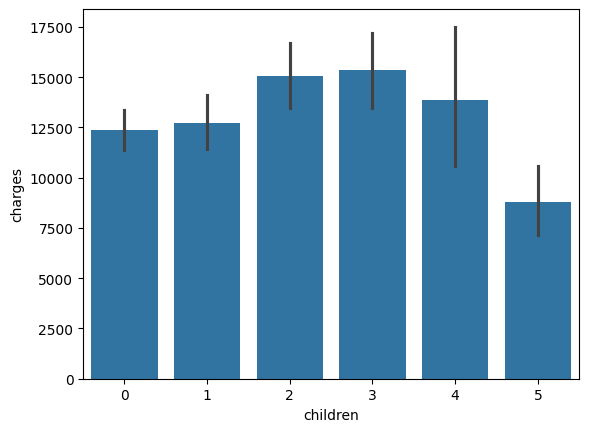

In [ ]:
#children vs charges
sns.barplot(x='children', y='charges', data =df)

Text(0.5, 1.0, 'Charges vs BMI')

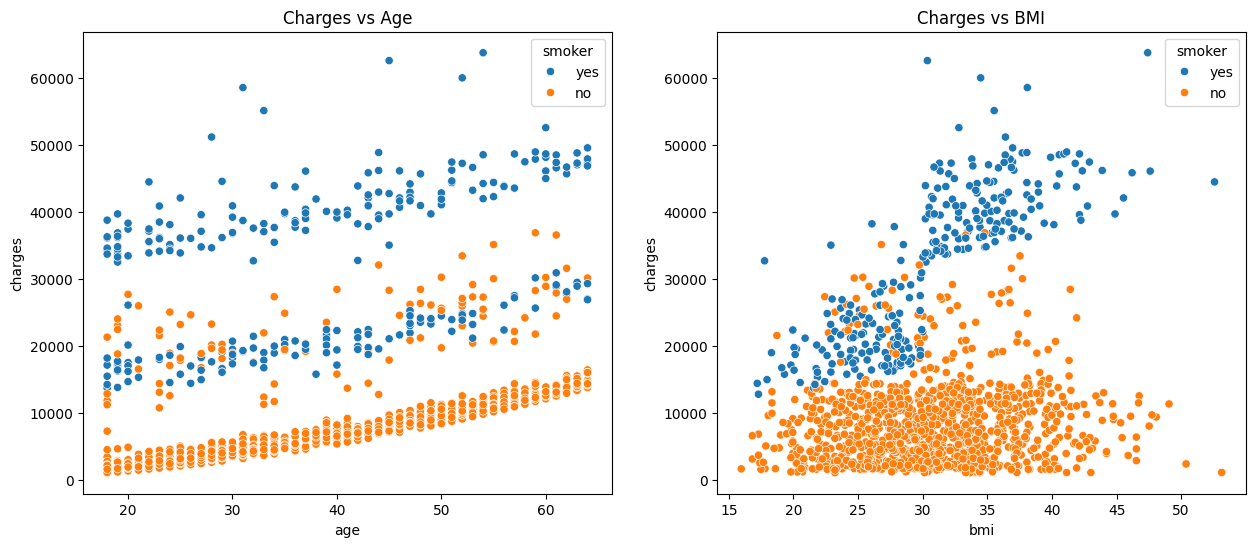

In [ ]:
figure, axs =plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(x='age', y='charges', hue='smoker', data =df, ax=axs[0])
axs[0].set_title('Charges vs Age')

sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', ax=axs[1])
axs[1].set_title('Charges vs BMI')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
categorical_columns=["sex", "smoker","region"]
df_encode = pd.get_dummies(data=df, prefix='OHE', prefix_sep="_", columns = categorical_columns, drop_first=True, dtype='int8')

In [ ]:
df_encode

,age,bmi,children,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1337 non-null   int64  
 1   bmi            1337 non-null   float64
 2   children       1337 non-null   int64  
 3   charges        1337 non-null   float64
 4   OHE_male       1337 non-null   int8   
 5   OHE_yes        1337 non-null   int8   
 6   OHE_northwest  1337 non-null   int8   
 7   OHE_southeast  1337 non-null   int8   
 8   OHE_southwest  1337 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 58.8 KB


Linear modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
#identify features and target variable
x=df_encode.drop("charges", axis=1)#features In pandas, axis=1 refers to columns, while axis=0 refers to rows.
y=df_encode["charges"]#target


In [ ]:
#split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [ ]:
x_train.shape

(1069, 8)

In [ ]:
x_test.shape

(268, 8)

In [ ]:
#create model
model =LinearRegression()

#fit model to the training data
model.fit(x_train, y_train)



LinearRegression()

In [ ]:
#make y pred
y_pred=model.predict(x_test)

<Axes: xlabel='charges'>

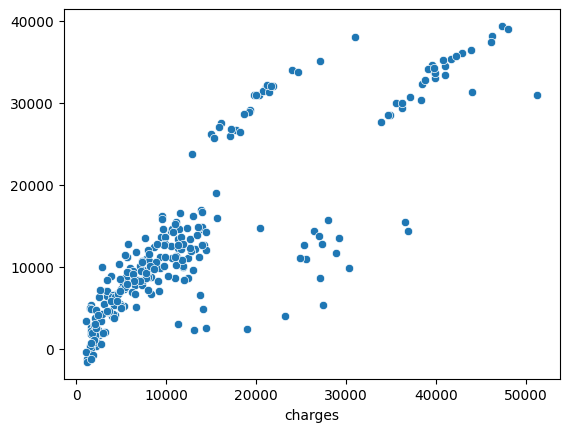

In [ ]:
#visualize
sns.scatterplot(x=y_test,y= y_pred)


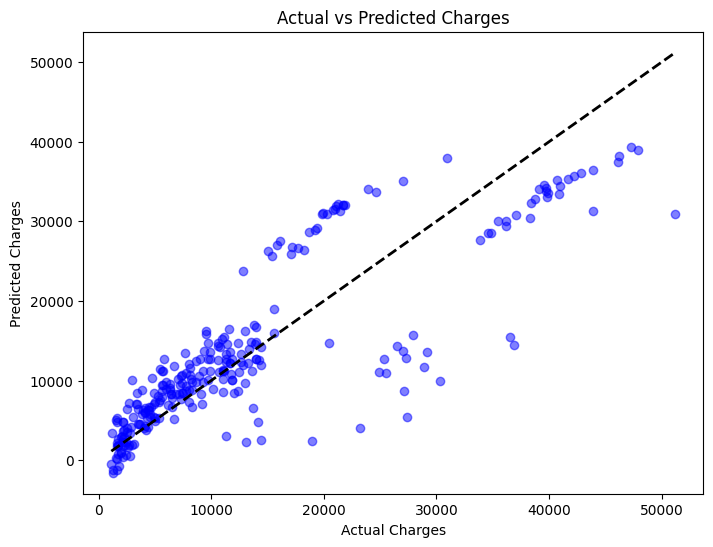

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line for comparison
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()


In [ ]:
df_encode.columns

Index(['age', 'bmi', 'children', 'charges', 'OHE_male', 'OHE_yes',
       'OHE_northwest', 'OHE_southeast', 'OHE_southwest'],
      dtype='object')

In [ ]:
new_data = pd.DataFrame({"age":[25], "bmi":[20],"children":[3],'OHE_male':[1], 'OHE_yes':[0],
       'OHE_northwest':[1], 'OHE_southeast':[0], 'OHE_southwest':[0]})
prediction= model.predict(new_data)
print(f' predicted charges for this new person is:{prediction[0]}')

 predicted charges for this new person is:2262.3736777706


In [ ]:
#evaluate model
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test, y_pred)
print('Mean Absolue Error:', mae)

Mean Absolue Error: 4476.75278222733


In [ ]:
#evaluate model
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 40797942.379731685


In [ ]:
#evaluate model
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 6387.326700563522


In [ ]:
#evaluate model
from sklearn.metrics import mean_squared_log_error
rmsle = np.log(np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error:', rmsle)

Root Mean Squared Log Error: 8.76207110311667


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

In [ ]:
n=len(df)
k=x.shape[1]# number o predictor features
adjusted_r2 =1-((1-r2)*(n-1)/(n-k-1))

In [ ]:
print('adjusted_r2', adjusted_r2)